<a href="https://colab.research.google.com/github/JimKing100/SF_Real_Estate_Project/blob/master/SF%20Map%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install fiona

In [0]:
import pandas as pd

from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

from descartes import PolygonPatch

from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep

from itertools import chain
import fiona

In [0]:
shp = fiona.open('/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898.shp')

In [0]:
# Extract map boundaries
bds = shp.bounds
shp.close()
extra = 0.01
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
# width, height of map
w, h = coords[2] - coords[0], coords[3] - coords[1]

In [0]:
m = Basemap(
    projection='tmerc',
    lon_0=-122.,
    lat_0=37.7,
    ellps = 'WGS84',
    llcrnrlon=coords[0] - extra * w,
    llcrnrlat=coords[1] - extra + 0.01 * h,
    urcrnrlon=coords[2] + extra * w,
    urcrnrlat=coords[3] + extra + 0.01 * h,
    lat_ts=0,
    resolution='i',
    suppress_ticks=True)

(92,
 5,
 [-122.51494807968153, 37.70808933741858, 0.0, 0.0],
 [-122.35696603928594, 37.811573987414484, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7f14404a5d68>)

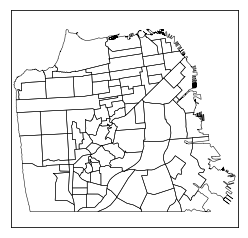

In [92]:
m.readshapefile(
    '/content/geo_export_965a7270-cc48-41f8-a2cf-b2b7fce81898',
    'SF',
    color='black',
    zorder=2)

In [93]:
df_map = pd.DataFrame({
    'poly': [Polygon(xy) for xy in m.SF],
    'ward_name': [ward['nbrhood'] for ward in m.SF_info]})
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000
# Draw neighborhoods with polygons
df_map['patches'] = df_map['poly'].map(lambda x: PolygonPatch(
    x,
    fc='#808080',
    ec='#ffffff', lw=.5, alpha=1,
    zorder=4))

df_map.sample(n=5)

,poly,ward_name,area_m,area_km,patches
22,"POLYGON ((7194.613860502861 4788.557733850771,...",Glen Park,1.420976e+06,14.209755,"PathPatch69((7194.61, 4788.56) ...)"
91,"POLYGON ((2070.892936450386 9810.709624165227,...",Lincoln Park,1.491527e+06,14.915269,"PathPatch563((2070.89, 9810.71) ...)"
13,"POLYGON ((10016.47285092327 9775.81380744023, ...",Downtown,8.505431e+05,8.505431,"PathPatch27((10016.5, 9775.81) ...)"
4,"POLYGON ((9969.501990147706 5508.065990637874,...",Bernal Heights,2.827494e+06,28.274940,"PathPatch61((9969.5, 5508.07) ...)"
98,"POLYGON ((9813.003258332792 978.3732470777521,...",Little Hollywood,4.244982e+05,4.244982,"PathPatch21((9813, 978.373) ...)"


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

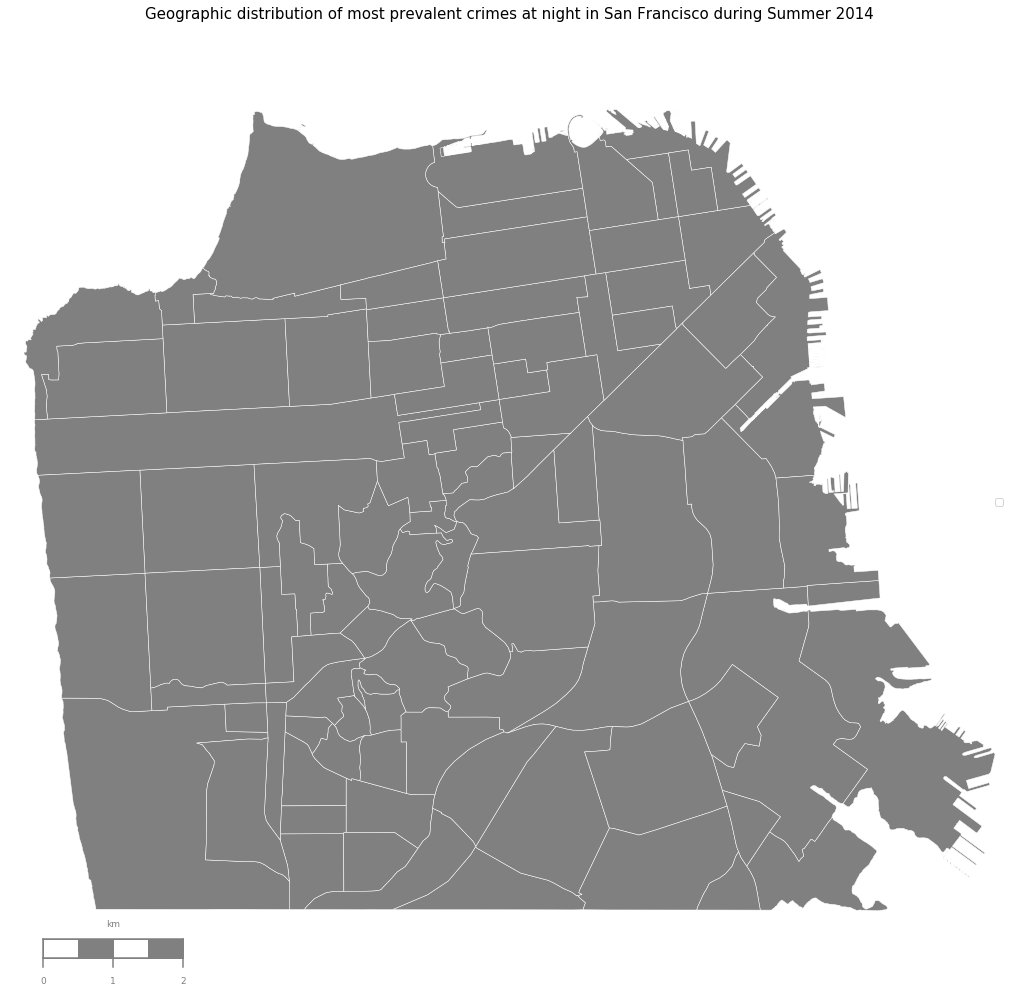

In [95]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, frame_on=False)

ax.add_collection(PatchCollection(df_map['patches'].values, match_original=True))

m.drawmapscale(
    coords[0] + 0.015, coords[1] - 0.005,
    coords[0], coords[1],
    2.,
    barstyle='fancy', labelstyle='simple',
    fillcolor1='w', fillcolor2='#808080',
    fontcolor='#808080',
    zorder=5)

plt.tight_layout()
plt.legend(loc="center right")
plt.title("Geographic distribution of most prevalent crimes at night in San Francisco during Summer 2014", size=15)
fig.set_size_inches(15,15)
plt.show()